# RIP constants of random matrices
Based on an exercise from https://nbviewer.jupyter.org/github/gpeyre/numerical-tours/blob/master/python/sparsity_6_l1_recovery.ipynb

In [1]:
"""Raquel García Bellés
Bachelor's degree in Mathematics
Universitat Autònoma de Barcelona
Final project - Beating the Nyquist-Shannon theorem with randomness: the magic of compressed sensing.
Last update: 17/05/2021"""

from numpy import random
import scipy as sc
from numpy.linalg import pinv
import numpy as np
import matplotlib.pyplot as plt

get_delta_1 = lambda A: 1-np.linalg.eigvalsh(np.dot(A.transpose(),A))[0]
get_delta_2 = lambda A: np.linalg.eigvalsh(np.dot(A.transpose(),A))[-1]-1
def estimate_RIP(A, klist, trials):
    delta_1 = []
    delta_2 = [] 
    for k in klist:
        delta_1_trial = []
        delta_2_trial = []
        for i in range(0,trials):
            # we sample k columns of the A matrix
            q = random.permutation(n)
            sample = q[:k]
            A_sampled = A[:,sample]
            delta_1_trial.append(get_delta_1(A_sampled))
            delta_2_trial.append(get_delta_2(A_sampled))
        delta_1.append(np.max(delta_1_trial))
        delta_2.append(np.max(delta_2_trial))
    
    #delta = np.maximum(delta_1,delta_2)
    return delta_1, delta_2

## Gaussian random matrix with variance 1/m

In [39]:
n = 600
m = 300
k_max = 21
klist = np.arange(1,k_max)

trials = 2000 # in total we could take n over k submatrices, but we will take only n submatrices at random


A = 1/np.sqrt(m)*np.random.randn(m,n)
delta_1, delta_2 = estimate_RIP(A, klist, trials)

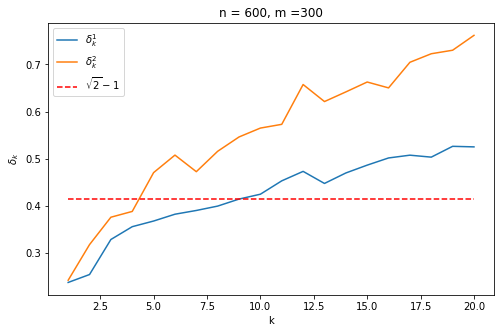

In [40]:
plt.figure(figsize = (8,5))
plt.plot(klist,delta_1,label='$\delta_k^1$' )
plt.plot(klist,delta_2,label ='$\delta_k^2$')
#plt.plot(klist,delta)
plt.plot(klist,np.zeros(len(klist))+np.sqrt(2)-1, 'r--',label = '$\sqrt{2}-1$')
plt.xlabel('k')
plt.ylabel('$\delta_k$')
plt.title('n = 600, m =%u' %m )
plt.legend()
# the restricted isometry constant is the maximum of the deltas

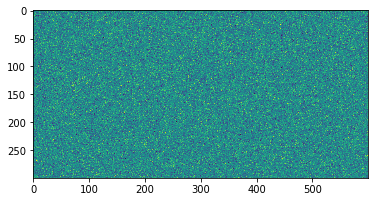

In [41]:
plt.imshow(A)

## Gaussian random matrix with normalized columns

In [42]:
n = 600
m = 300
k_max = 21
klist = np.arange(1,k_max)


trials = 2000 # in total we could take n over k submatrices, but we will take only n submatrices at random

A0 = np.random.randn(m,n)
A = A0/np.tile(np.sqrt(np.sum(A0**2,0)), (np.shape(A0)[0],1))
delta_1, delta_2 = estimate_RIP(A, klist, trials)

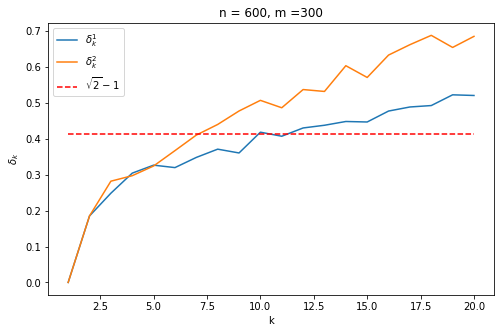

In [43]:
plt.figure(figsize = (8,5))
plt.plot(klist,delta_1,label='$\delta_k^1$' )
plt.plot(klist,delta_2,label ='$\delta_k^2$')
#plt.plot(klist,delta)
plt.plot(klist,np.zeros(len(klist))+np.sqrt(2)-1, 'r--',label = '$\sqrt{2}-1$')
plt.xlabel('k')
plt.ylabel('$\delta_k$')
plt.title('n = 600, m =%u' %m )
plt.legend()
# the restricted isometry constant is the maximum of the deltas

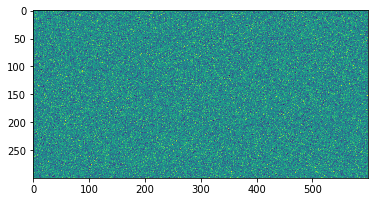

In [44]:
plt.imshow(A)

## Bernoulli random matrix

In [44]:
from scipy.stats import bernoulli
n = 600
m = 200
k_max = 21
klist = np.arange(3, 200, 10)#np.arange(1,k_max)

trials = 2000 # in total we could take n over k submatrices, but we will take only n submatrices at random


p = 1/2
r = bernoulli.rvs(p, size=(m,n))
A = 1/np.sqrt(m)*(2*r-np.ones((m,n)))

delta_1, delta_2 = estimate_RIP(A, klist, trials)
delta_1_1, delta_2_2 = estimate_RIP(A, np.arange(1,k_max), trials)

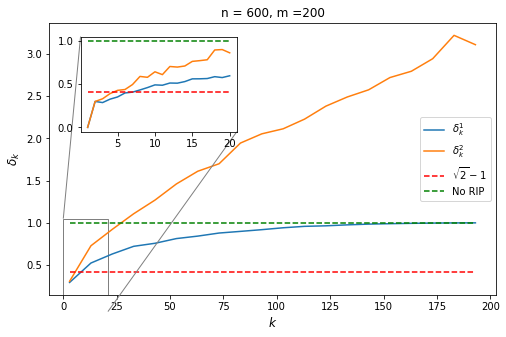

In [83]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)




fig, ax = plt.subplots(figsize=[8, 5])

ax.plot(klist,delta_1,label='$\delta_k^1$' )
ax.plot(klist,delta_2,label ='$\delta_k^2$')
#plt.plot(klist,delta)
ax.plot(klist,np.zeros(len(klist))+np.sqrt(2)-1, 'r--',label = '$\sqrt{2}-1$')
ax.plot(klist,np.ones(len(klist)), 'r--',label = 'No RIP', color = 'green')
ax.set_xlabel('$k$',fontsize = 12)
ax.set_ylabel('$\delta_k$',fontsize = 12)

axin = plt.axes([0,0,1,20])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.07,0.6,0.35,0.35])
axin.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax, axin, loc1=2, loc2=4, fc="none", ec='0.5')
axin.plot(np.arange(1,k_max),delta_1_1)
axin.plot(np.arange(1,k_max),delta_2_2)
#plt.plot(klist,delta)
axin.plot(np.arange(1,k_max),np.zeros(len(delta_1_1))+np.sqrt(2)-1, 'r--')
axin.plot(np.arange(1,k_max),np.ones(len(delta_1_1)), 'r--', color = 'green')

ax.set_title('n = 600, m =%u' %m )
ax.legend(loc = 5)
plt.savefig('RIPBernouilli.png',bbox_inches='tight')
# the restricted isometry constant is the maximum of the deltas

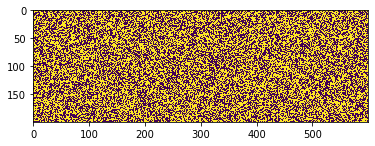

In [82]:
plt.imshow(A)

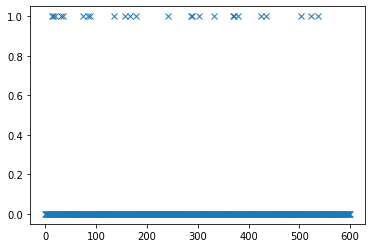

In [8]:
#generating the signal
x = np.zeros(n)
k = 25
perm = np.floor(np.random.rand(k)*n).astype(int)
x[perm] = 1
plt.plot(x, 'x')

# we take the samples
y = A@x

In [9]:
from scipy.optimize import minimize
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'eq', 'fun': lambda x:  A@x - y}) # equality constraint function must be zero
x0 = np.linalg.pinv(A)@y #initial guess
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s = res.x

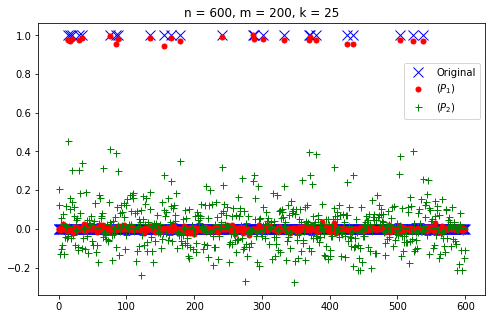

In [80]:
plt.figure(figsize = (8,5))
plt.plot(x, 'x', color = 'blue', label = 'Original', markersize = 10)
plt.plot(s,'o', color = 'red', label = r'$(P_1)$', markersize = 5)
plt.plot(x0, '+', color = 'green', label = r'$(P_2)$', markersize = 7)
plt.legend(loc = 5,bbox_to_anchor=(1, 0.75))
plt.title('n = 600, m = 200, k = 25')
plt.savefig('k25m200n600.png',bbox_inches='tight')


In [84]:
from scipy.stats import bernoulli
n = 600

klist = np.arange(3, 200, 10)#np.arange(1,k_max)

trials = 2000 # in total we could take n over k submatrices, but we will take only n submatrices at random


p = 1/2
errors = []

for m in [100,200,300]:
    r = bernoulli.rvs(p, size=(m,n))
    A = 1/np.sqrt(m)*(2*r-np.ones((m,n)))

    delta_1, delta_2 = estimate_RIP(A, klist, trials)
    
    error = []
    for k in klist:
        #generating the signal
        x = np.zeros(n)
        perm = np.floor(np.random.rand(k)*n).astype(int)
        x[perm] = 1

        # we take the samples
        y = A@x
        constr = ({'type': 'eq', 'fun': lambda x:  A@x - y}) # equality constraint function must be zero
        x0 = np.linalg.pinv(A)@y #initial guess
        res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
        s = res.x
        error.append(np.sum(np.abs(np.subtract(x,s))))
    errors.append(error)


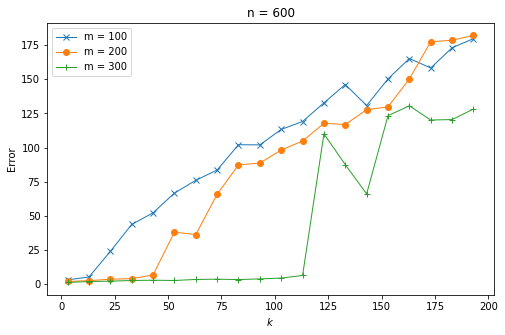

In [89]:
plt.figure(figsize = (8,5))
plt.plot(klist, errors[0], 'x-',linewidth = 1,label = 'm = 100')
plt.plot(klist, errors[1], 'o-',linewidth = 1,label = 'm = 200')
plt.plot(klist, errors[2], '+-', linewidth = 1, label = 'm = 300')
plt.xlabel('$k$')
plt.ylabel('Error')
plt.title('n = 600')
plt.legend(loc = 0)
plt.savefig('errorsBernouilli.png',bbox_inches='tight')